# Implementing Ant Colony Optimization (ACO) algorithm for a given Symmetric traveling salesman problem (TSP)</h1>

##### Yefferson A. Marín Cantero
Artificial intelligence course <br>
Systems Engineering Programa <br>
Universidad Tecnológica de Bolívar <br>
Cartagena de Indias, D.T. y C - Bolívar <br>
1p-2020

## Definitions
### Ant Colony Optimization (ACO)
It is an **optimization algorithm** used to find the shortest path between points or nodes. It is developed by observing the behaviour of ants when they follow a path to their food source. Ants are essentially blind so they follow pheromone trails left behind by other ants on the path. This algorithm follows the same approach by using the probability of going to the next node as the distance to the node and the amount of pheromones.

### Symmetric traveling salesman problem (TSP)
Given a set of **n** nodes and distances for each pair of **nodes**, find a roundtrip of minimal total length visiting each node exactly once. The distance from node *i* to node *j* is the same as from node *j* to node *i*.

## Introduction
This algorithm is done using the following requirements:

* [Python](https://python.org)
* [Numpy](https://numpy.org)
* [Matplotlib](https://matplotlib.org)

And its taking as data the **The 100-city problem A** `kroA100.tsp` by *Krolak/Felts/Nelson* (and additional results for **52 locations in Berlin** `berlin52.tsp` by *Groetschel*). The purpose is to find the shortest path to travel in a closed path between all the locations (nodes), and plot space and path. 

## Steps
### 1. Initialize Ants
First its required to select a given (or arbitrary) number of ants, placed in random positions of the given TSP space. 

### 2. Ants moving via probability
Then for each of the ants we complete a closed path i.e. from start, covering all the nodes and without repeating any of the nodes. To move an ant from one node to the next we use the following formula.

$$P_{ij}(t)=\frac{\tau_{ij}^\alpha + \eta_{ij}^\beta}{\sum (\tau^\alpha + \eta^\beta)} $$

Where $\tau$ (*tau*) is the amount of pheromones and $\eta$ (*eta*) is the inverse of the distance ($1/d$).

$\alpha$ (*alpha*) and $\beta$ (*beta*) are the algorithm's parameters. They are used to give more or less weight to the distance or pheromones while selecting the next node.

### 3. Deposit of Pheromones
When an ant moves from a node to the next, it leaves a trail for the next ant to follow, the more ants follow the same path, the stronger the pheromone trail gets. Pheromone trails are incremented by.

$$\tau^{(i+1)} = \tau^i + \Delta\tau $$ 

Where $\Delta\tau$ (*delta_tau*) is a prameter and $i$ is the iteration number.

### 4. Evaporation of Pheromones
After each iteration the pheromones also tend to evaporate. The evaporation of pheromones are given as. 

$$\tau^{(i+1)} = (1 - \rho)\tau^i $$ 

where $\rho$ (*rho*) is the evaporation rate.

### 5. Ending condition
We can use any condition to terminate the search, such as a distance below a certain threshold. In this implementation, the ending condition will be the number of iterations.

## Implementation
Initially we import the **library.py** and **matplotlib**, as it follows:

In [1]:
from library import *
import matplotlib.pyplot as plt

### TSP file
A **Symmetric traveling salesman problem (TSP)** file has the following structure: 

```txt
  1- NAME : <string>
  2- TYPE : <string>
  3- COMMENT : <string>
  4- DIMENSION : <integer>
  5- EDGE WEIGHT TYPE : <string>
  6- NODE COORD SECTION : <integer> <real> <real>
  7- EOF

  1- Identifies the data file
  2- Specifies the type of the data (TSP: Data for a symmetric traveling salesman problem)
  3- Additional comments (usually the name of the contributor or creator of the problem instance is given here).
  4- For a TSP the dimension is the number of its nodes
  5- Specifies how the edge weights (or distances) are given (EUC 2D: Weights are Euclidean distances in 2-D)
  6- Node coordinates are given in this section. Each line is of the form
  7- Terminates the input data. This entry is optional.
```

As some functions has been defined in `libraries.py`, we can call a method that reads our TSP file and store its data in order to use later. To start, we will use the **The 100-city problem A** (`kroA100.tsp`) by *Krolak/Felts/Nelson*).

In [2]:
# Get TSP data
TSP = getTspData('data/kroA100.tsp')

# Display TSP file headers
displayTspHeaders(TSP)


Name:  kroA100
Type:  TSP
Comment:  100-city
Dimension:  100
Edge Weight Type:  EUC_2D 



### Space
We can use now its coordenates pairs to plot nodes, this representation is what is called **space**.

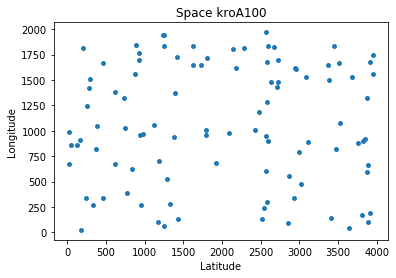

In [3]:
# Get Space
space = np.array(TSP['node_coord_section'])

# Plot nodes
plt.scatter(space[:, 0], space[:, 1], s = 15)

# Plot properties
plt.title('Space {}'.format(TSP['name']))
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()
plt.close()

Then we call the algorithm as it follows. By default our algorithm parameters will be: 

```python
    {numpy.ndarray} space    -- The space
    {int} iterations {80}    -- Number of iterations (Ending condition)
    {int} colony {50}        -- Number of ants in the colony
    {float} alpha {1.0}      -- Alpha algorithm parameter, more or less weight to a selected distance
    {float} beta {1.0}       -- Beta algorithm parameter, more or less weight to a selected distance
    {float} del_tau {1.0}    -- Delta Tau algorithm parameter, pheromones releasing rate
    {float} rho {0.5}        -- Rho algorithm parameter, pheromones evaporation rate
```

But they can be changed passing them as argument to the `runAcoTsp()` function like:

```python
    iterations = 100
    colony = 25
    alpha = 1.2
    beta = 1.5
    del_tau = 2
    rho = 0.2
    
    # Call passing arguments
    min_path, min_distance = runAcoTsp(space, iterations, colony, alpha, beta, del_tau, rho)
```

In this case we will run it as *default*, by using `runAcoTsp(space)`.

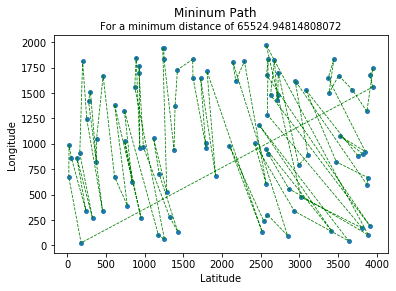

In [4]:
# Run ACO
min_path, min_distance = runAcoTsp(space)

# Plot path
plt.scatter(space[:, 0], space[:, 1], marker='o', s=15)
plt.plot(space[min_path, 0], space[min_path, 1], c='g', linewidth=0.8, linestyle="--")

# Plot properties
plt.suptitle('Mininum Path')
plt.title('For a minimum distance of {}'.format(min_distance), fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()
plt.close()

As it shows in last plot, after perform the number of iteration (our ending condition), the shortes path is represented by the green line, and it minimum distance is calculated as well. 

In order to watch the algorith initial points randomness, we will perform it again, but a total of 3 times to to get an average minimum distance. 

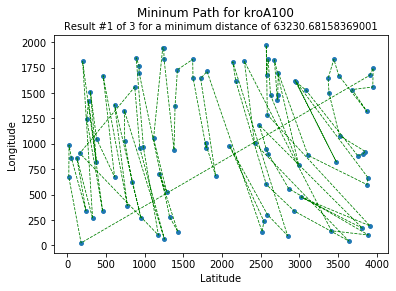

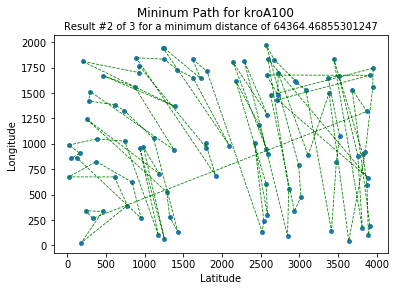

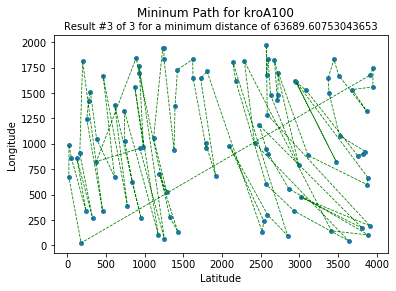

Min Distance Average for the last 3 results is 63761.58588904634


In [5]:
# Vars
n = 3 
average = 0 

# Repeat
for i in range(n):
    # Call
    min_path, min_distance = runAcoTsp(space)
    average += min_distance 
    
    # Plot path
    plt.scatter(space[:, 0], space[:, 1], marker='o', s=15)
    plt.plot(space[min_path, 0], space[min_path, 1], c='g', linewidth=0.8, linestyle="--")

    # Plot properties
    plt.suptitle('Mininum Path for {}'.format(TSP['name']))
    plt.title('Result #{} of {} for a minimum distance of {}'.format(i + 1, n, min_distance), fontsize = 10)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
        
    plt.show()
    plt.close()
    
# Show Average
print('Min Distance Average for the last {} results is {}'.format(n, average/n))

### Extras
The same functions can be used to and additional results for **52 locations in Berlin** (`berlin52.tsp`) by *Groetschel* but using a differente set of algorithm parameters.


Name:  berlin52
Type:  TSP
Comment:  52
Dimension:  52
Edge Weight Type:  EUC_2D 



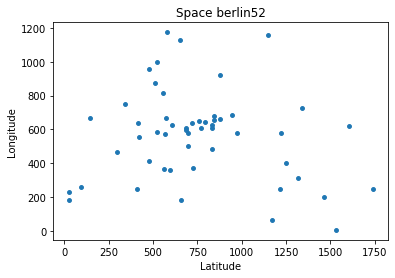

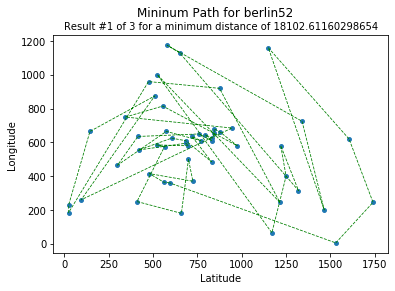

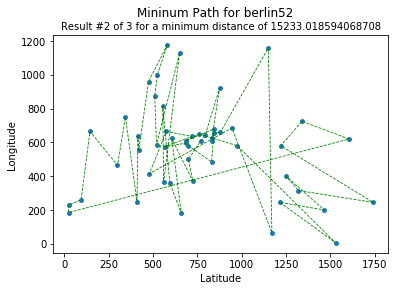

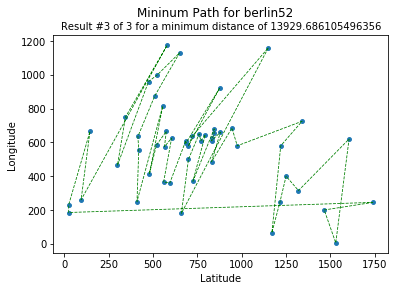

Min Distance Average for the last 3 results is 15755.105434183866


In [6]:
# Get TSP data
TSP = getTspData('data/berlin52.tsp')

# Display TSP file headers
displayTspHeaders(TSP)

# Get Space
space = np.array(TSP['node_coord_section'])

# Plot nodes
plt.scatter(space[:, 0], space[:, 1], s = 15)

# Plot properties
plt.title('Space {}'.format(TSP['name']))
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()
plt.close()

# Algorithm Parameters
iterations = 50
colony = 25
alpha = 1
beta = 1
del_tau = 1.5
rho = 0.5

# Vars
average = 0 

# Repeat
for i in range(n):
    # Run
    min_path, min_distance = runAcoTsp(space, iterations, colony, alpha, beta, del_tau, rho)
    average += min_distance
    
    # Plot path
    plt.scatter(space[:, 0], space[:, 1], marker='o', s=15)
    plt.plot(space[min_path, 0], space[min_path, 1], c='g', linewidth=0.8, linestyle="--")

    # Plot properties
    plt.suptitle('Mininum Path for {}'.format(TSP['name']))
    plt.title('Result #{} of {} for a minimum distance of {}'.format(i + 1, n, min_distance), fontsize = 10)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
        
    plt.show()
    plt.close()
    
# Show Average
print('Min Distance Average for the last {} results is {}'.format(n, average/n))


### Generate files 
Additionally, within our **library.py** there is also a **testing.py**, by typing in console:

```sh
  py testing.py
```

We are going to get generated files for a number *n* of results:

* `tsp-space.png` - With the nodes representation
* `tsp-path-n.png` - For each path result
* `tsp-results.txt` - For a summary of results (min_distances) + average (avg_min_distance)  result

The command will output some contextual messages ir order to know the execution process: 

```sh 
    [Testing ACO_TSP] Computing 3 times for kroA100
    [Testing ACO_TSP] results/kroA100-space.png generated
    [Testing ACO_TSP] results/kroA100-path-1.png generated
    [Testing ACO_TSP] results/kroA100-path-2.png generated
    [Testing ACO_TSP] results/kroA100-path-3.png generated
    [Testing ACO_TSP] results/kroA100-results.txt generated
    [Testing ACO_TSP] Computing 3 times for berlin52
    [Testing ACO_TSP] results/berlin52-space.png generated
    [Testing ACO_TSP] results/berlin52-path-1.png generated
    [Testing ACO_TSP] results/berlin52-path-2.png generated
    [Testing ACO_TSP] results/berlin52-path-3.png generated
    [Testing ACO_TSP] results/berlin52-results.txt generated
    [Testing ACO_TSP] All files generated, see /results for details
```

All those generated files, will be availables at `/results` in projects root. 


### Source code
All code has been deployed at *Github* and its available at [yammadev/aco-tsp](https://github.com/yammadev/aco-tsp). 